In [5]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../src/')
from neuralnetwork import *
from analysis import *
from util import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = QLayer(n_qubits=1, n_features=1, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=10000)
layer2 = QLayer(n_qubits=3, n_features=3, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=10000)
layer3 = QLayer(n_qubits=3, n_features=3, n_targets=1, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=1, backend=backend, shots=10000)


layers = [layer1, layer2, layer3]

optimizer = Adam(lr=0.01)
network = NeuralNetwork(layers, optimizer)

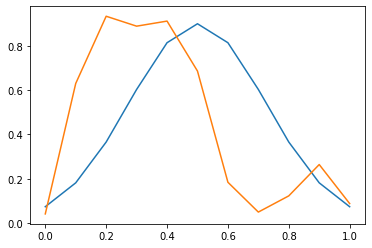

In [7]:
x = np.linspace(0, 1, 11).reshape(-1,1)
y = 0.9*np.exp(-10*(x-0.5)**2)
y_pred_pre = network.predict(x)

plt.plot(x, y)
plt.plot(x, y_pred_pre)
plt.show()

In [4]:
network.train(x, y, epochs=5, verbose=True)

  0%|          | 0/5 [00:00<?, ?it/s]

Process ForkProcess-793:
Process ForkProcess-789:
Process ForkProcess-791:
Process ForkProcess-788:
Process ForkProcess-796:
Process ForkProcess-794:
Process ForkProcess-795:
Process ForkProcess-792:
Process ForkProcess-790:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/mult

  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/concurrent/futures/process.py", line 237, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/queues.py", line 102, in get
    with self._rlock:
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/queues.py", line 103, in get
    res = self._recv_bytes()
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/connection.py", line 221, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/connection.py", line 419, in _recv_bytes
    buf = self._recv(4)
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/connection.py

QiskitError: 'Keyboard interrupt in parallel_map.'

In [8]:
y_pred_post = network.predict(x)

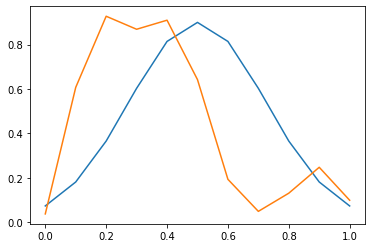

In [9]:
plt.plot(x, y)
plt.plot(x, y_pred_post)
plt.show()

In [11]:
network.save(data_path("network1"))

In [12]:
network_loaded = loader(data_path("network1"))

In [16]:
y_pred_loaded = network_loaded.predict(x)

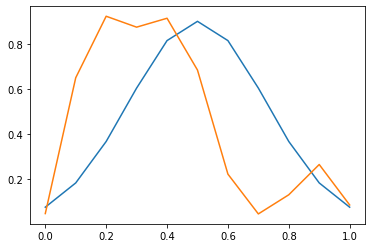

In [17]:
plt.plot(x, y)
plt.plot(x, y_pred_loaded)
plt.show()